<a href="https://colab.research.google.com/github/asgarali429/Machine-learning/blob/main/Regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implement the SimpleLinearRegression using scikit learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

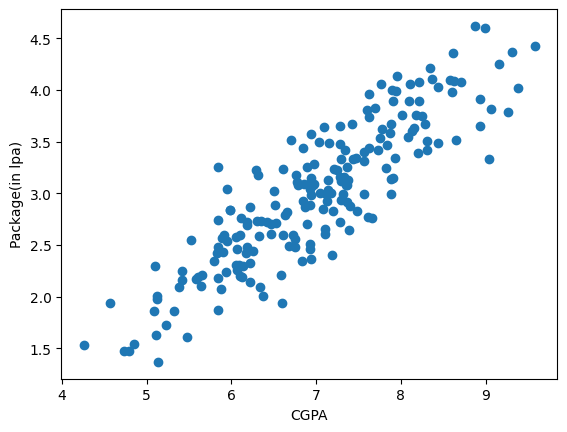

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [4]:
x=df.iloc[:,0:1]
y= df.iloc[:,-1]

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [8]:
ypred = lr.predict(xtest)

In [9]:
print(ypred[0])

3.891116009744203


Text(0, 0.5, 'Package(in lpa)')

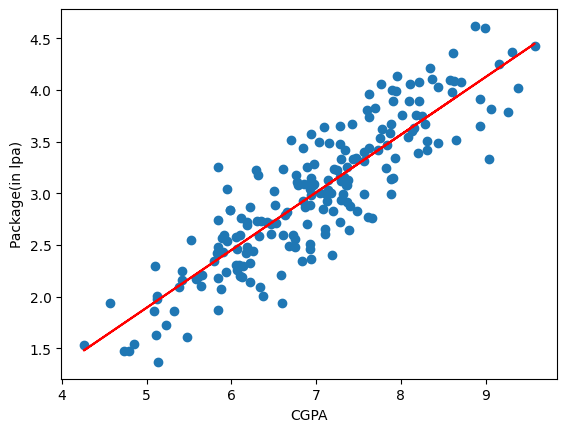

In [10]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(xtrain,lr.predict(xtrain),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [12]:
ypred = lr.predict(xtest)

In [13]:
print('MAE',mean_absolute_error(ytest,ypred))

MAE 0.2884710931878175


In [14]:
print('MSE',mean_squared_error(ytest,ypred))

MSE 0.12129235313495527


In [16]:
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))

RMSE 0.34827051717731616


In [19]:
r = r2_score(ytest,ypred)
print('r2score',r)

r2score 0.780730147510384


In [22]:
xtest.shape

(40, 1)

In [25]:
#Absolute r2score = 1 - (1 -r) * (n-1)/ (n-1-k)   r = r2score , n= no.of xtest ,k = number of feature or column
1 - (1-r) * (40-1) / (40-1-1)


0.7749598882343415

In [27]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.082097,3.26
1,5.12,0.209462,1.98
2,7.82,0.996397,3.25
3,7.42,0.028311,3.67
4,6.94,0.002048,3.57


Text(0, 0.5, 'Package(in lpa)')

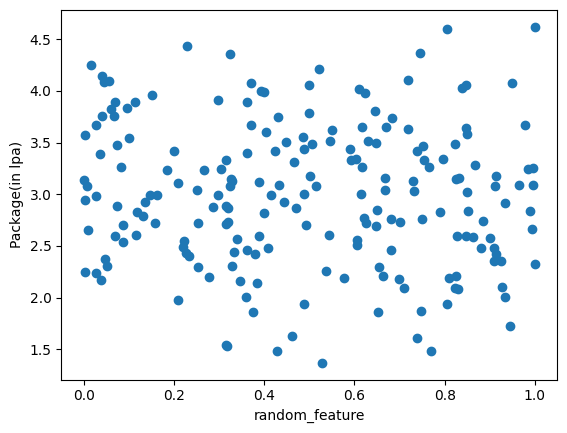

In [28]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [29]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
ypred = lr.predict(X_test)

In [37]:
r = r2_score(ytest,ypred)
print('r2score',r)

r2score 0.7722088507304097


if there is no pattern in data than absolute r2 decrease or it is stable

In [39]:
#Absolute r2score = 1 - (1 -r) * (n-1)/ (n-1-k)   r = r2score , n= no.of xtest ,k = number of feature or column
1 - ((1-r)*(40-1)/(40-1-2))

0.7598958156347562

In [47]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
149,8.28,3.67,3.67
35,6.87,2.07,2.87
15,7.25,3.33,3.23
107,6.33,3.19,2.59
183,7.28,1.52,2.72


Text(0, 0.5, 'Package(in lpa)')

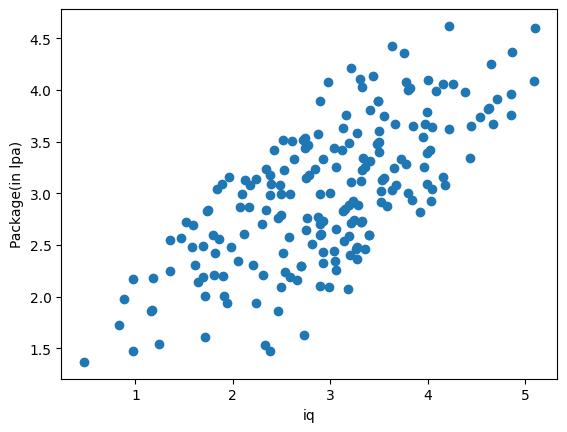

In [48]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [49]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [52]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.794180996139268


absolute r2score is increase when the data follow some pattern

In [53]:
#Absolute r2score = 1 - (1 -r) * (n-1)/ (n-1-k)   r = r2score , n= no.of xtest ,k = number of feature or column
1 - ((1-r)*(40-1)/(40-1-2))

0.7598958156347562



1)Mean Squared Error (MSE):

Measures the average squared difference between actual and predicted values.
Useful when you want to penalize large errors more heavily.
Sensitive to outliers because of squaring.

2)Root Mean Squared Error (RMSE):

Square root of MSE, giving the average deviation in the same units as the target variable.
Provides a more interpretable measure of error compared to MSE.
Useful when you want to understand the typical magnitude of prediction errors.

3)Mean Absolute Error (MAE):

Measures the average absolute difference between actual and predicted values.
Less sensitive to outliers compared to MSE because it doesn't square the errors.
Useful when you want a metric that's more robust to outliers.

4)R-squared (Coefficient of Determination):

Measures the proportion of variance in the dependent variable explained by the independent variables.
Ranges from 0 to 1, where 1 indicates a perfect fit.
Useful for assessing how well the model fits the data overall.

5)Adjusted R-squared:

Adjusts R-squared for the number of predictors in the model.
Penalizes the addition of unnecessary variables, providing a more conservative estimate of model fit.
Useful when comparing models with different numbers of predictors.